In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from os import path
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
# import datetime as dt
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# import calendar
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# %matplotlib inline
# import time
# import os

In [2]:
# Dataset Config Files

from config import Config
# ['Reddit', 'iSarcasm']
cfg = Config('iSarcasm')
dataset = cfg.dataset
file_path = cfg.input_file_path 
comment_col_name = cfg.comment_col_name
label_col_name = cfg.label_col_name
print(f"Dataset: {dataset}, Path: {file_path}")

Dataset: iSarcasmEval, Path: ..\data\iSarcasmEval\train.csv


In [3]:
# Check if preprocessed file exists, load if it is available
assert Path(cfg.preprocessed_file_path_all_cols).exists, f"File not found {cfg.preprocessed_file_path_all_cols}"
data = pd.read_csv(cfg.preprocessed_file_path_all_cols)
data.head()

,Unnamed: 0.1,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,text,text_lemmatized,removed_stop_words
0,0,0.0,the only thing i got from college is a caffein...,1.0,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0,NaN,"['the', 'only', 'thing', 'i', 'got', 'from', '...","['thing', 'got', 'college', 'caffeine', 'addic..."
1,1,1.0,i love it when professors draw a big question ...,1.0,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,"['i', 'love', 'it', 'when', 'professor', 'draw...","['love', 'professor', 'draw', 'big', 'question..."
2,2,2.0,remember the hundred emails from companies whe...,1.0,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,NaN,"['remember', 'the', 'hundred', 'email', 'from'...","['remember', 'hundred', 'email', 'company', 'c..."
3,3,3.0,today my poppop told me i was not forced to go...,1.0,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,NaN,"['today', 'my', 'poppop', 'told', 'me', 'i', '...","['today', 'poppop', 'told', 'wa', 'forced', 'g..."
4,4,4.0,volphancarol littlewhitty mysticalmanatee i di...,1.0,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,"['volphancarol', 'littlewhitty', 'mysticalmana...","['volphancarol', 'littlewhitty', 'mysticalmana..."


In [4]:
print(data['removed_stop_words'])

0       ['thing', 'got', 'college', 'caffeine', 'addic...
1       ['love', 'professor', 'draw', 'big', 'question...
2       ['remember', 'hundred', 'email', 'company', 'c...
3       ['today', 'poppop', 'told', 'wa', 'forced', 'g...
4       ['volphancarol', 'littlewhitty', 'mysticalmana...
                              ...                        
3462    ['population', 'spike', 'chicago', '9', 'month...
3463    ['youd', 'think', 'second', 'last', 'english',...
3464    ['im', 'finally', 'surfacing', 'holiday', 'sco...
3465    ['couldnt', 'prouder', 'today', 'well', 'done'...
3466    ['overheard', '13', 'year', 'old', 'game', 'fr...
Name: removed_stop_words, Length: 3467, dtype: object


In [5]:
from typing import List, Tuple, Iterable
from collections import Counter, defaultdict
from pprint import pprint
import spacy
from spacy.tokens import Token
import pickle
from ast import literal_eval

In [6]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Our sample input
text = 'SpaCy is capable of    tagging, parsing and annotating text. It recognizes sentences and stop words.'

# Parse the sample input
doc = nlp(text)

# print(nlp.pipe_labels)
# print(dir(spacy.parts_of_speech))

POS_TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'CONJ', 'DET', 'EOL', 'IDS', 'INTJ', 'NAMES', 'NOUN', 'NO_TAG', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SPACE', 'SYM', 'VERB', 'X']
for pos_tag in POS_TAGS:
     print(pos_tag, " -- ", spacy.explain(pos_tag))
    #  print(pos_tag, " -- ", spacy.glossary.explain(pos_tag))

SENTIMENT_RELATED_TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'CONJ', 'INTJ', 'PUNCT', 'SCONJ','SYM', 'VERB']
REDUCED_SENTIMENT_RELATED_TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'VERB']

# For every sentence
# for sent in doc.sents:
#     for token in sent:
#         print(token.is_stop)
    
    # For every token
    # for token in sent:
    #     # Print the token itself, the pos tag, 
    #     # dependency tag and whether spacy thinks this is a stop word
    #     print(token, token.pos_, token.dep_, token.is_stop)

ADJ  --  adjective
ADP  --  adposition
ADV  --  adverb
AUX  --  auxiliary
CCONJ  --  coordinating conjunction
CONJ  --  conjunction
DET  --  determiner
EOL  --  end of line
IDS  --  None
INTJ  --  interjection
NAMES  --  None
NOUN  --  noun
NO_TAG  --  None
NUM  --  numeral
PART  --  particle
PRON  --  pronoun
PROPN  --  proper noun
PUNCT  --  punctuation
SCONJ  --  subordinating conjunction
SPACE  --  space
SYM  --  symbol
VERB  --  verb
X  --  other


c:\Users\omars\miniconda3\envs\nlp\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'IDS' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
c:\Users\omars\miniconda3\envs\nlp\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'NAMES' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
c:\Users\omars\miniconda3\envs\nlp\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term 'NO_TAG' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [7]:
%%time     
def find_keywords(text: pd.Series, n_keywords: int) -> List[Tuple[Tuple[str], int]]:
    '''
    Extract the top n most frequent keywords from the text.
    Keywords are sequences of adjectives and nouns that end in a noun
    
    Arguments:
        text        pd.Series(list(str))
                    Each element is an array of strings
        n_keywords  int
                    the number of keywords to return

    Returns:
        keywords    list(tuple(str, int))
                    List of keywords and their count, sorted by the count
    '''
    
    keywords = []
    keywords_dict = defaultdict(int)
    
    for words in text:
        for word in literal_eval(words):
            keywords_dict[word] += 1
                
    # pprint(keywords_dict)                
    # We add the values to the keywords list and return it
    top_n = Counter(keywords_dict)
    for keyword_str, count in top_n.most_common(n_keywords):
        keyword = tuple(keyword_str.split(" "))
        keywords.append((keyword, count))
    
    return keywords

CPU times: total: 0 ns
Wall time: 0 ns


In [7]:
# Extract keywords from sarcastic comments
sarcastic_comments = data.loc[data[label_col_name] == 1, "removed_stop_words"]
keywords = find_keywords(sarcastic_comments, n_keywords=15)
print(keywords)

# print(sarcastic_comments)
# for elem in sarcastic_comments:
#     for word in literal_eval(elem):
#         print(word)

[(('im',), 109), (('love',), 86), (('day',), 72), (('like',), 70), (('get',), 62), (('time',), 52), (('wa',), 48), (('one',), 48), (('dont',), 44), (('people',), 42), (('really',), 40), (('would',), 38), (('know',), 37), (('ive',), 33), (('go',), 33)]


In [8]:
# Extract keywords from sarcastic comments
non_sarcastic_comments = data.loc[data[label_col_name] == 0, "removed_stop_words"]
keywords = find_keywords(non_sarcastic_comments, n_keywords=15)
print(keywords)

# print(sarcastic_comments)
# for elem in sarcastic_comments:
#     for word in literal_eval(elem):
#         print(word)

[(('im',), 294), (('wa',), 251), (('like',), 209), (('one',), 179), (('time',), 175), (('get',), 171), (('day',), 158), (('people',), 149), (('love',), 141), (('dont',), 135), (('ive',), 134), (('year',), 119), (('really',), 108), (('thing',), 106), (('think',), 105)]


In [35]:
# Download the spacy english model before running this code
# python -m spacy download en_core_web_sm --user

class POSKeywordExtractor:
    def __init__(self):
        # Set up SpaCy in a more efficient way by disabling what we do not need
        # This is the dependency parser (parser) and the named entity recognizer (ner)
        self.nlp = spacy.load(
            'en_core_web_sm', 
        ) # disable=['ner', 'parser']
        # Add the sentencizer to quickly split our text into sentences
        # pipe = self.nlp.create_pipe()
        # pipeline = ['parser', 'ner', 'tagger']
        # for pipe in pipeline:
        #     self.nlp.add_pipe(pipe)
        # self.nlp.add_pipe() # 'sentencizer'
        # Increase the maximum length of text SpaCy can parse in one go
        self.nlp.max_length = 1500000
        
    def validate_keyphrase(self, candidate: Iterable[Token]) -> Iterable[Token]:
        '''
        Takes in a list of tokens which are all proper nouns, nouns or adjectives
        and returns the longest sequence that ends in a proper noun or noun
        
        Args:
            candidate         -- List of spacy tokens
        Returns:
            longest_keyphrase -- The longest sequence that ends in a noun
                                 or proper noun
                                 
        Example:
            candidate = [neural, networks, massively]
            longest_keyphrase = [neural, networks]
        '''
        # YOUR CODE HERE
        noun_indices = [idx for idx, token in enumerate(candidate) 
                      if str(token.pos_) == "NOUN" or str(token.pos_) == "PROPN"]
        max_index = max(noun_indices) if noun_indices != [] else 0
        return candidate[:max_index+1]

    def keyword_extractor(self, text: pd.Series, n_keywords: int, remove_stop: bool=False) -> List[Tuple[Tuple[str], int]]:
        '''
        Extract the top n most frequent keywords from the text.
        Keywords are sequences of adjectives and nouns that end in a noun
        
        Arguments:
            text        pd.Series(list(str))
                        Each element is a string
            n_keywords  int
                        the number of keywords to return
            remove_stop bool
                        removes stop words
        
        Returns:
            keywords    list(tuple(str, int))
                        List of keywords and their count, sorted by the count
        '''
        
        keywords = []
        keywords_dict = defaultdict(int)
        
        for words in text:
            for word in literal_eval(words):
                keywords_dict[word] += 1
                    
        # pprint(keywords_dict)                
        # We add the values to the keywords list and return it
        top_n = Counter(keywords_dict)
        for keyword_str, count in top_n.most_common(n_keywords):
            keyword = tuple(keyword_str.split(" "))
            keywords.append((keyword, count))
        
        return keywords

    def keywords(self, text: str, n_keywords: int, min_freq: int) -> List[Tuple[Tuple[str], int]]:
        '''
        Extract the top n most frequent keywords from the text.
        Keywords are sequences of adjectives and nouns that end in a noun
        
        Arguments:
            text            pd.Series(list(str))
                            Each element is a string
            n_keywords -- the number of keywords to return
            min_words  -- the number of words a potential keyphrase has to include
                          if this is set to 2, then only keyphrases consisting of 2+ words are counted
        Returns:
            keywords   -- List of keywords and their count, sorted by the count
        '''
        print(f"Number of input examples: {len(text.tolist())}")
        str_text = ".\n".join(text.tolist())
        doc = self.nlp(str_text)
        print(f"Number of sentences found: {len([1 for sent in doc.sents])}")
        # for sent in doc.sents:
        #     print(sent)
        # for idx, token in enumerate(doc.sents):
        #     print(idx, token)
        # print(doc, doc.sents, doc.text, dir(doc))
        # for line in text:
        #     print(self.nlp(line))
        # comments = [self.nlp(comment) for comment in text]
        keywords = []
        keywords_dict = defaultdict(int)
        
        # Sentiment related POS tags
        SENTIMENT_RELATED_TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'CONJ', 'INTJ', 'PUNCT', 'SCONJ','SYM', 'VERB']
        REDUCED_SENTIMENT_RELATED_TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'VERB']

        # Go through each sentence
        for sentence in doc.sents: 
        # for comment in comments:
            
        #     candidates = [[]]
            for token in sentence:
                # Check if the token related to sentiment POS and add to list of candidates
                if any(pos in str(token.pos_) for pos in REDUCED_SENTIMENT_RELATED_TAGS) and \
                    not token.is_stop and \
                    len(str(token.lemma_))>1:
                    # print(token, type(token), str(token), str(token).lower())
                    # print(token.lemma_)
                    keywords_dict[str(token.lemma_).lower()] += 1
                
                    # If yes, append to make nominal candidate
#                     candidates[-1].append(token)
#                 else:
#                     candidates.append([])
            
#             # Remove all empty candidates
# #             candidates = list(filter(None, candidates))
#             candidates = [elem for elem in candidates if elem != []]
            
#             # Check if we have keywords
#             if len(candidates)>0:
#                 temp_keywords = [self.validate_keyphrase(candidate) for candidate in candidates]  
#                 temp_keywords = [elem for elem in temp_keywords if len(elem)>=min_words]
                
#                 # We the add this to the main keywords list
#                 for keyword in temp_keywords:
#                     if keyword == []: # Skip exceptions
#                         continue
#                     str_keyword = " ".join(list(map(str, keyword)))
#                     keywords_dict[str_keyword] += 1
                    
        # pprint(keywords_dict)
        # sum = 0
        # for k,v in keywords_dict.items():
        #     sum += v         
        # print(len(keywords_dict), sum)     
        # We add the values to the keywords list and return it
        top_n = Counter(keywords_dict)
        for word, count in sorted(keywords_dict.items(), key=lambda x:x[1], reverse=True):
            if count >= min_freq:
                keywords.append((word, count))
        # print(top_n)
        # for keyword_str, count in top_n.items():
        #     if count < min_words:
        #         break
        #     # keyword = tuple(keyword_str.split(" "))
        #     keywords.append((keyword_str, count))
        
        return keywords
        # return 0

In [ ]:
# POSKeywordExtractor()
sarcastic_comments = data.loc[data[label_col_name] == 1, comment_col_name]
# print(sarcastic_comments)
sarcastic_keywords = POSKeywordExtractor().keywords(sarcastic_comments, n_keywords=15, min_freq=5)
print(sarcastic_keywords)

[('love', 75), ('go', 58), ('like', 56), ('think', 46), ('know', 42), ('good', 41), ('ve', 40), ('get', 35), ('wait', 31), ('tell', 23)]


C:\Users\omars\AppData\Local\Temp\ipykernel_10612\1492731460.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= False)


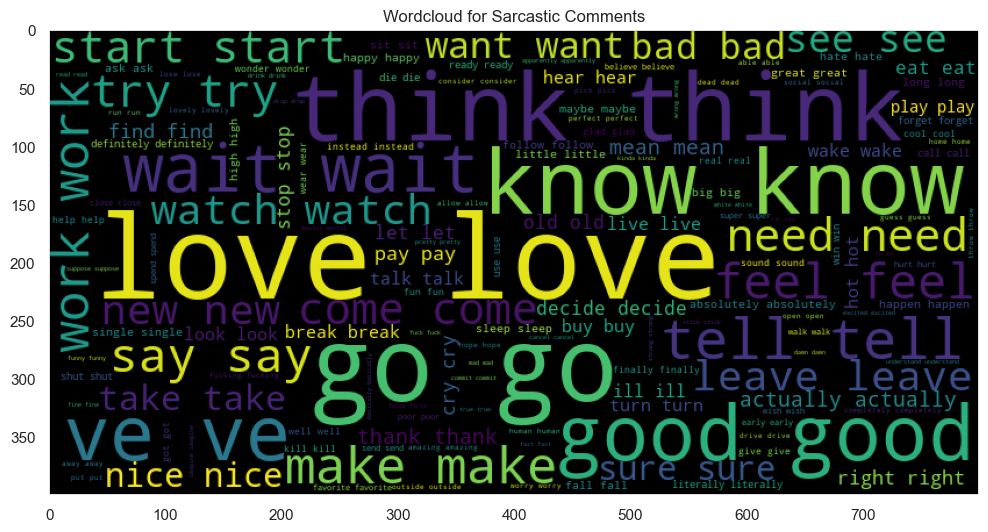

In [41]:
from wordcloud import WordCloud, STOPWORDS
print(sarcastic_keywords[:10])
sarcastic_keywords_cloud = " ".join(list(Counter(dict(sarcastic_keywords)).elements()))

wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(sarcastic_keywords_cloud)
plt.grid(b= False)
plt.title("Wordcloud for Sarcastic Comments")
plt.imshow(wordcloud)

In [ ]:
non_sarcastic_comments = data.loc[data[label_col_name] == 0, comment_col_name]
non_sarcastic_keywords = POSKeywordExtractor().keywords(non_sarcastic_comments, n_keywords=15, min_freq=5)
print(non_sarcastic_keywords)

[('good', 165), ('ve', 165), ('like', 155), ('think', 153), ('go', 151), ('get', 148), ('know', 109), ('love', 108), ('want', 105), ('feel', 104)]


C:\Users\omars\AppData\Local\Temp\ipykernel_10612\3026330243.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= False)


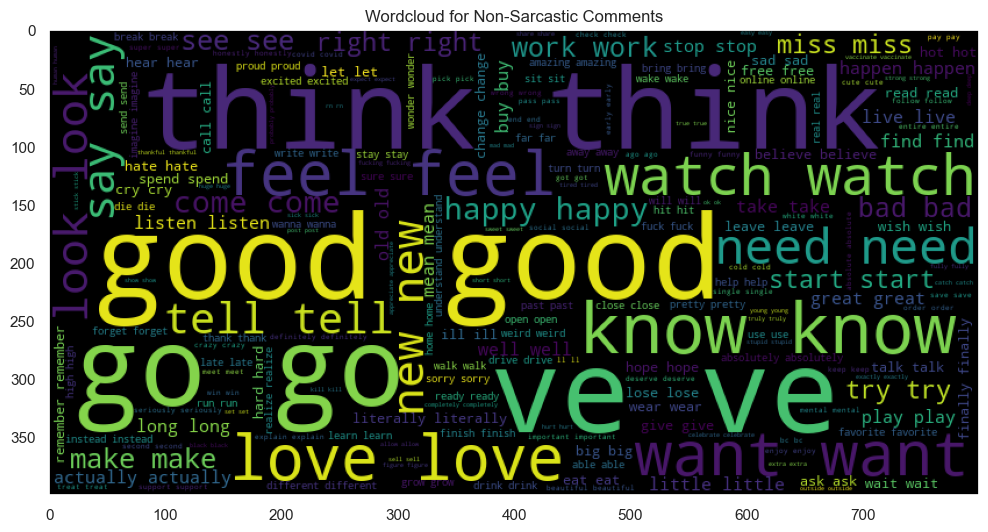

In [44]:
from wordcloud import WordCloud, STOPWORDS
print(non_sarcastic_keywords[:10])
non_sarcastic_keywords_cloud = " ".join(list(Counter(dict(non_sarcastic_keywords)).elements()))

wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(non_sarcastic_keywords_cloud)
plt.grid(b= False)
plt.title("Wordcloud for Non-Sarcastic Comments")
plt.imshow(wordcloud)

In [ ]:
with open('/srv/shares/NLP/wiki_nlp.txt', 'r') as corpus_file:
    text = corpus_file.read()
    
keywords = POSKeywordExtractor().keywords(text.lower(), n_keywords=15, min_words=1)

'''
Expected output:
The keyword ('words',) appears 353 times.
The keyword ('text',) appears 342 times.
The keyword ('example',) appears 263 times.
The keyword ('word',) appears 231 times.
The keyword ('natural', 'language', 'processing') appears 184 times.
...
'''
for keyword in keywords:
    print('The keyword {} appears {} times.'.format(*keyword))